## Entropic Value at Risk Portfolio Optimization with Python and Riskfolio-Lib

https://pyquantnews.com/replicate-your-favorite-investment-portfolio/

https://financioneroncios.wordpress.com/2021/02/24/entropic-value-at-risk-portfolio-optimization-with-python-and-riskfolio-lib/

https://deliverypdf.ssrn.com/delivery.php?ID=756021072024122101113080093000022069015032009051054004022007118025031123094099065078007052003023030014055091125104097092068123056022088032093121090125094079093006025053006012092086102009074081093099022074080095098108102093090018086021077071119124094064&EXT=pdf&INDEX=TRUE

In [1]:
import riskfolio as rp
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [3]:
assets = ['VBL.NS', 'TATAPOWER.NS', 'TRIDENT.NS', 'HSCL.NS', 'MARKSANS.NS', 'SAIL.NS', 'KALYANKJIL.NS', 'IRB.NS',
          'HDFCBANK.NS','ONGC.NS','RICOAUTO.NS','AAVAS.NS','FILATEX.NS','BCLIND.NS','^NSEI']

data = yf.download(assets, start="2023-01-01", end="2024-04-20")
data = data.loc[:, ("Adj Close", slice(None))]
data.columns = assets

[*********************100%%**********************]  15 of 15 completed


In [4]:
returns = data.pct_change().dropna()
bench_returns = returns.pop("^NSEI").to_frame()

In [5]:
port = rp.Portfolio(returns=returns)
port.assets_stats(method_mu="hist", method_cov="hist", d=0.94)
port.kindbench = False
port.benchindex = bench_returns
port.allowTE = True
port.TE = 0.008

In [6]:
model = "Classic"
rm = "CVaR"
obj = "Sharpe"
hist = True
rf = 0
l = 0
w = port.optimization(
    model=model,
    rm=rm,
    obj=obj,
    rf=rf,
    l=l,
    hist=hist
)

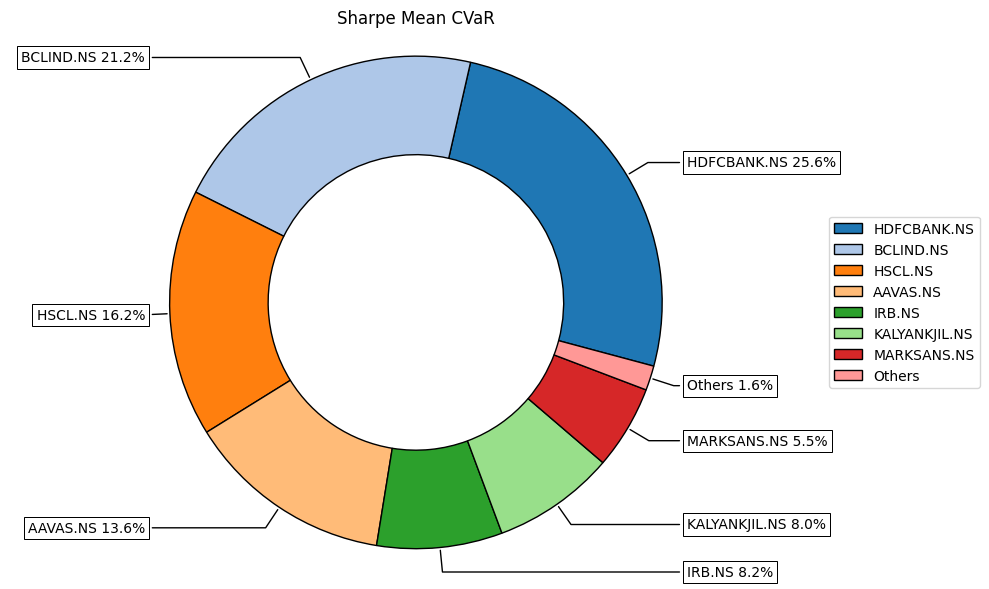

In [7]:
ax = rp.plot_pie(
    w=w,
    title="Sharpe Mean CVaR",
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None,
)

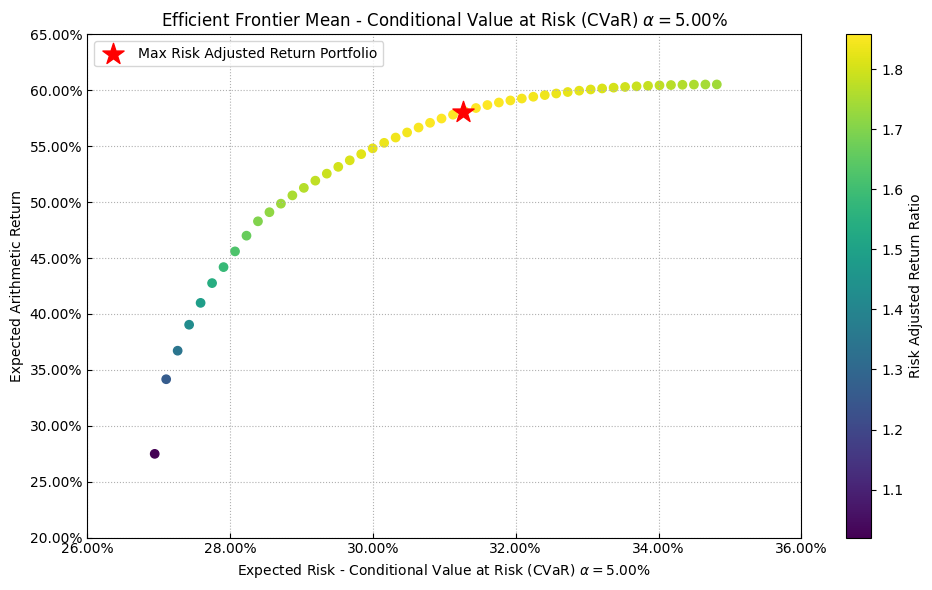

In [8]:
frontier = port.efficient_frontier(
    model=model, 
    rm=rm, 
    points=50, 
    rf=rf, 
    hist=hist
)
ax = rp.plot_frontier(
    w_frontier=frontier,
    mu=port.mu,
    cov=port.cov,
    returns=port.returns,
    rm=rm,
    rf=rf,
    cmap="viridis",
    w=w,
    label="Max Risk Adjusted Return Portfolio",
    marker="*",
)

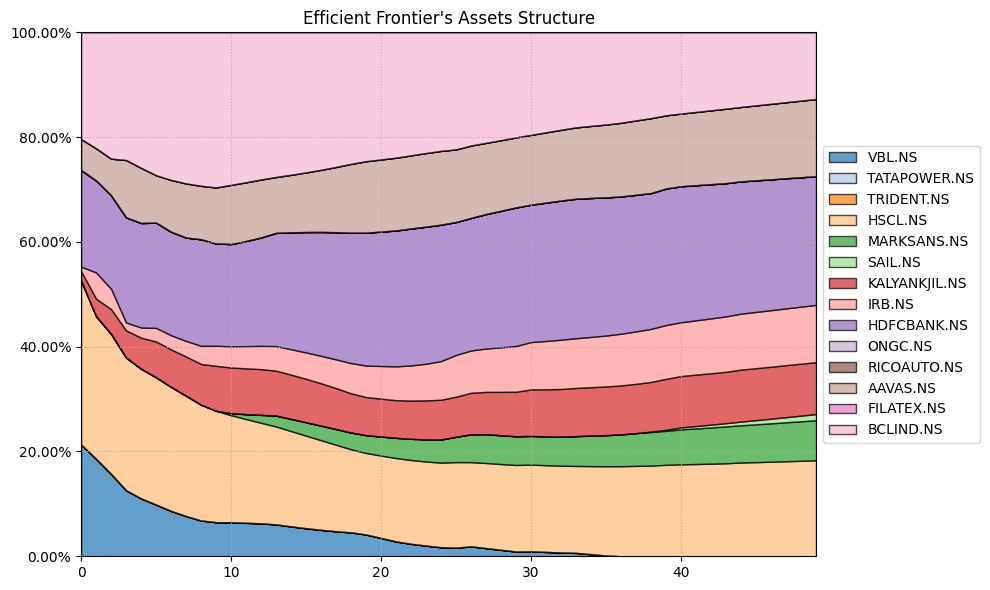

In [9]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


In [10]:
if w_rp is not None:
    display(w_rp.T)
else:
    print("w_rp is None. Check the function call.")


NameError: name 'w_rp' is not defined

## New

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2023-01-01'
end = '2024-04-20'

# Tickers of assets
assets = ['VBL.NS', 'TATAPOWER.NS', 'TRIDENT.NS', 'HSCL.NS', 'MARKSANS.NS', 'SAIL.NS', 'KALYANKJIL.NS', 'IRB.NS',
          'HDFCBANK.NS','ONGC.NS','RICOAUTO.NS','AAVAS.NS','FILATEX.NS','BCLIND.NS']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets


[*********************100%%**********************]  14 of 14 completed


In [10]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AAVAS.NS,BCLIND.NS,FILATEX.NS,HDFCBANK.NS,HSCL.NS,IRB.NS,KALYANKJIL.NS,MARKSANS.NS,ONGC.NS,RICOAUTO.NS,SAIL.NS,TATAPOWER.NS,TRIDENT.NS,VBL.NS
Date,,,,,,,,,,,,,,
2023-01-03,-0.5613%,-1.6044%,0.3282%,0.6539%,-0.5486%,0.2548%,-0.3197%,0.2549%,-0.5982%,-0.3614%,-0.6746%,-0.2360%,0.0000%,-1.9803%
2023-01-04,-2.0244%,-1.6306%,-1.4177%,-1.7873%,-1.8556%,1.4930%,-3.1275%,0.0847%,-2.2066%,-1.2696%,-3.5088%,-1.5377%,-1.1628%,0.1416%
2023-01-05,-1.7029%,-2.3749%,-2.3230%,-0.6428%,-0.5621%,-3.5837%,1.9040%,-0.3387%,0.1709%,-2.5107%,2.5220%,-0.2403%,0.1471%,0.0229%
2023-01-06,0.8749%,1.0286%,-2.4915%,-0.3313%,-1.4388%,-1.8017%,-2.1933%,-0.9346%,0.5802%,1.8216%,-1.7163%,-1.0597%,-1.0279%,-0.6074%
2023-01-09,1.9779%,19.9903%,9.2915%,0.1944%,-0.2086%,0.6446%,3.9867%,2.0583%,0.5429%,0.3701%,2.1537%,0.3895%,-0.4451%,0.6034%


In [20]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

port.solvers = ['MOSEK'] # It is recommended to use mosek when optimizing EVaR 
port.alpha = 0.05 # Significance level for CVaR, EVaR y CDaR 
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'EVaR' # Risk measure used, this time will be EVaR
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

ModuleNotFoundError: No module named 'riskfolio.Portfolio'

## Updated

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format
# Date range
start = '2022-01-01'
end = '2024-04-22'
# Tickers of assets
assets = ['VBL.NS', 'TATAPOWER.NS', 'TRIDENT.NS', 'HSCL.NS', 'MARKSANS.NS', 'SAIL.NS', 'KALYANKJIL.NS', 'IRB.NS',
          'HDFCBANK.NS','ONGC.NS','RICOAUTO.NS','AAVAS.NS','FILATEX.NS','BCLIND.NS']
assets.sort()
# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  14 of 14 completed


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2022-01-01'
end = '2024-04-22'

# Read assets from CSV file
assets_df = pd.read_csv('../Price_Action/bison/Data/Plain_ADR_niftytotal750.csv')
assets = assets_df['Symbol'].tolist()
assets.sort()

# Downloading data
data = yf.download(assets, start=start, end=end)
data = data.loc[:, ('Adj Close', slice(None))]
data.columns = assets


[*********************100%%**********************]  57 of 57 completed


In [18]:
# Calculating returns
Y = data[assets].pct_change().dropna()
display(Y.tail())


# # Assuming 'Y' is your DataFrame containing the returns
# # Format the DataFrame to display values as percentages
# Y_formatted = Y.style.format("{:.2%}")

# # Apply a background gradient to the DataFrame
# # 'YlGn' is a color map that goes from yellow to green, suitable for positive values
# # You can choose other color maps based on your preference
# Y_gradient = Y_formatted.background_gradient(cmap='YlGn')

# # Display the formatted DataFrame with gradient background
# display(Y_gradient)


,ACE.NS,AEGISCHEM.NS,ANGELONE.NS,BCG.NS,BSE.NS,CAMLINFINE.NS,CGCL.NS,COCHINSHIP.NS,DBREALTY.NS,DHANI.NS,...,SANGHVIMOV.NS,SCHNEIDER.NS,SHILPAMED.NS,SINDHUTRAD.NS,SOBHA.NS,STLTECH.NS,TECHNOE.NS,TIMETECHNO.NS,TORNTPOWER.NS,WONDERLA.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-12,0.4177%,3.6474%,-1.0663%,0.3165%,-1.2066%,1.4818%,0.4128%,0.4075%,-1.9525%,1.3665%,...,-2.6497%,-1.1681%,-1.2303%,-4.0590%,-2.6181%,-2.2444%,-0.7336%,-3.1543%,0.6590%,-2.7765%
2024-04-15,-2.8915%,1.4992%,-1.5915%,-4.1009%,-1.5801%,-0.3768%,11.9461%,-3.6113%,-4.6164%,1.9608%,...,-2.6904%,-0.5581%,0.2966%,2.5000%,-1.1740%,-2.8426%,0.6352%,-1.2842%,-3.5262%,-3.3513%
2024-04-16,-0.9154%,7.8983%,0.5961%,-2.3026%,1.8497%,1.5130%,-2.3669%,4.3900%,-0.7117%,15.3846%,...,6.8413%,4.9657%,6.5550%,-3.1895%,1.6114%,6.7142%,4.3755%,-1.8100%,-1.1965%,0.6042%
2024-04-18,-2.4682%,-4.1829%,-2.0775%,0.3367%,-1.9272%,0.5123%,-3.6782%,-2.3111%,0.3106%,7.1875%,...,-0.9407%,-4.8566%,-2.9695%,-3.4884%,0.4353%,-8.6468%,6.5876%,-0.1344%,0.2887%,-1.9328%
2024-04-19,1.1545%,-1.8653%,-3.7489%,0.3356%,-0.4513%,0.4170%,-1.6923%,1.9622%,-1.7866%,0.6803%,...,1.1365%,-4.9987%,1.9258%,4.6185%,-2.2724%,-2.7703%,0.6601%,1.7689%,-0.6749%,0.9983%


In [17]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

output = w.T

display(output)


output_formatted = output.style.format("{:.2%}")


# Apply a background gradient to the DataFrame
# 'YlGn' is a color map that goes from yellow to green, suitable for positive values
# You can choose other color maps based on your preference
output_gradient = output_formatted.background_gradient(cmap='YlGn')

# Display the formatted DataFrame with gradient background
display(output_gradient)



,ACE.NS,AEGISCHEM.NS,ANGELONE.NS,BCG.NS,BSE.NS,CAMLINFINE.NS,CGCL.NS,COCHINSHIP.NS,DBREALTY.NS,DHANI.NS,...,SANGHVIMOV.NS,SCHNEIDER.NS,SHILPAMED.NS,SINDHUTRAD.NS,SOBHA.NS,STLTECH.NS,TECHNOE.NS,TIMETECHNO.NS,TORNTPOWER.NS,WONDERLA.NS
weights,0.0000%,4.8524%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,12.3272%,10.9360%,10.9633%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,26.2231%,0.0000%


,ACE.NS,AEGISCHEM.NS,ANGELONE.NS,BCG.NS,BSE.NS,CAMLINFINE.NS,CGCL.NS,COCHINSHIP.NS,DBREALTY.NS,DHANI.NS,ELECTCAST.NS,EMUDHRA.NS,ENGINERSIN.NS,EPIGRAL.NS,GRAVITA.NS,GRWRHITECH.NS,HCC.NS,HEG.NS,HINDCOPPER.NS,HMAAGRO.NS,IBREALEST.NS,IDEA.NS,IFBIND.NS,IIFL.NS,IIFLSEC.NS,IMFA.NS,INOXINDIA.NS,INOXWIND.NS,IPL.NS,JAIBALAJI.NS,JISLJALEQS.NS,JPASSOCIAT.NS,JYOTICNC.NS,KIRLOSBROS.NS,LLOYDSENGG.NS,METROBRAND.NS,MMTC.NS,MRPL.NS,NCC.NS,NUVAMA.NS,PAISALO.NS,PRESTIGE.NS,PURVA.NS,RAMKY.NS,RELINFRA.NS,RTNPOWER.NS,SANGHIIND.NS,SANGHVIMOV.NS,SCHNEIDER.NS,SHILPAMED.NS,SINDHUTRAD.NS,SOBHA.NS,STLTECH.NS,TECHNOE.NS,TIMETECHNO.NS,TORNTPOWER.NS,WONDERLA.NS
weights,0.00%,4.85%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,17.45%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,8.89%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,8.36%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,12.33%,10.94%,10.96%,0.00%,0.00%,0.00%,0.00%,0.00%,26.22%,0.00%


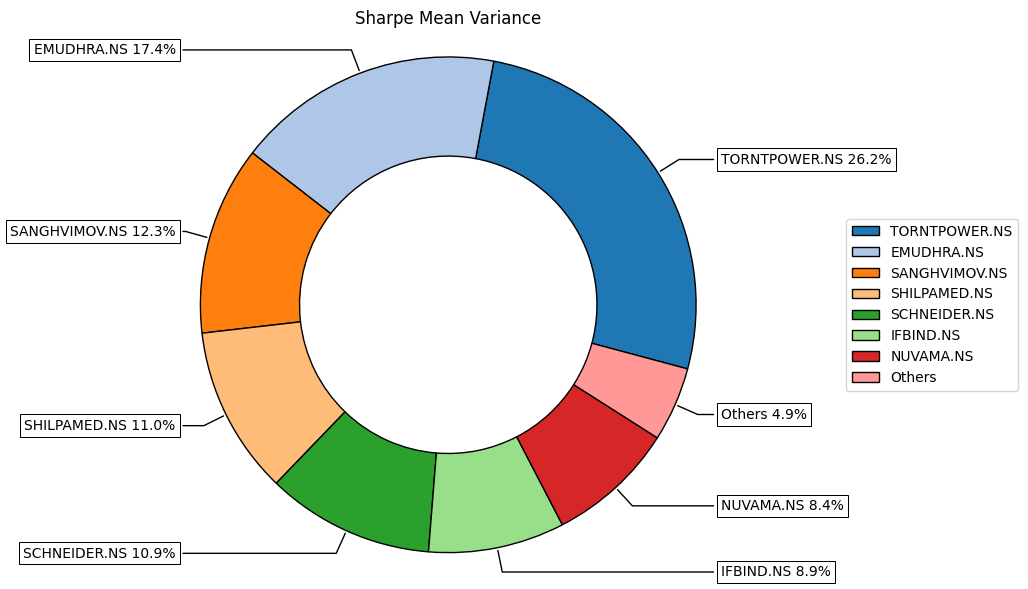

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.tail())

,ACE.NS,AEGISCHEM.NS,ANGELONE.NS,BCG.NS,BSE.NS,CAMLINFINE.NS,CGCL.NS,COCHINSHIP.NS,DBREALTY.NS,DHANI.NS,...,SANGHVIMOV.NS,SCHNEIDER.NS,SHILPAMED.NS,SINDHUTRAD.NS,SOBHA.NS,STLTECH.NS,TECHNOE.NS,TIMETECHNO.NS,TORNTPOWER.NS,WONDERLA.NS
45,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,6.5173%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
46,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,4.8456%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
47,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,3.2040%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
48,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,1.5896%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
49,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


,ACE.NS,AEGISCHEM.NS,ANGELONE.NS,BCG.NS,BSE.NS,CAMLINFINE.NS,CGCL.NS,COCHINSHIP.NS,DBREALTY.NS,DHANI.NS,...,SANGHVIMOV.NS,SCHNEIDER.NS,SHILPAMED.NS,SINDHUTRAD.NS,SOBHA.NS,STLTECH.NS,TECHNOE.NS,TIMETECHNO.NS,TORNTPOWER.NS,WONDERLA.NS
0,0.0000%,5.6628%,0.0000%,0.0000%,0.0000%,0.0000%,6.2018%,0.0000%,0.0000%,0.0000%,...,1.5865%,0.0000%,2.8385%,0.0000%,0.0000%,7.3264%,1.9007%,0.0000%,23.7243%,0.0000%
1,0.0000%,6.4634%,0.0000%,0.0000%,0.0000%,0.0000%,5.4864%,0.0000%,0.0000%,0.0000%,...,5.9337%,2.5330%,6.0397%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,25.7033%,0.0000%
2,0.0000%,6.7865%,0.0000%,0.0000%,0.0000%,0.0000%,4.6283%,0.0000%,0.0000%,0.0000%,...,8.5277%,4.9494%,7.0764%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,25.5007%,0.0000%
3,0.0000%,6.5045%,0.0000%,0.0000%,0.0000%,0.0000%,3.3430%,0.0000%,0.0000%,0.0000%,...,10.3727%,7.3277%,8.5155%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,25.6840%,0.0000%
4,0.0000%,5.2874%,0.0000%,0.0000%,0.0000%,0.0000%,0.5720%,0.0000%,0.0000%,0.0000%,...,11.8932%,10.2122%,10.5282%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,26.2512%,0.0000%


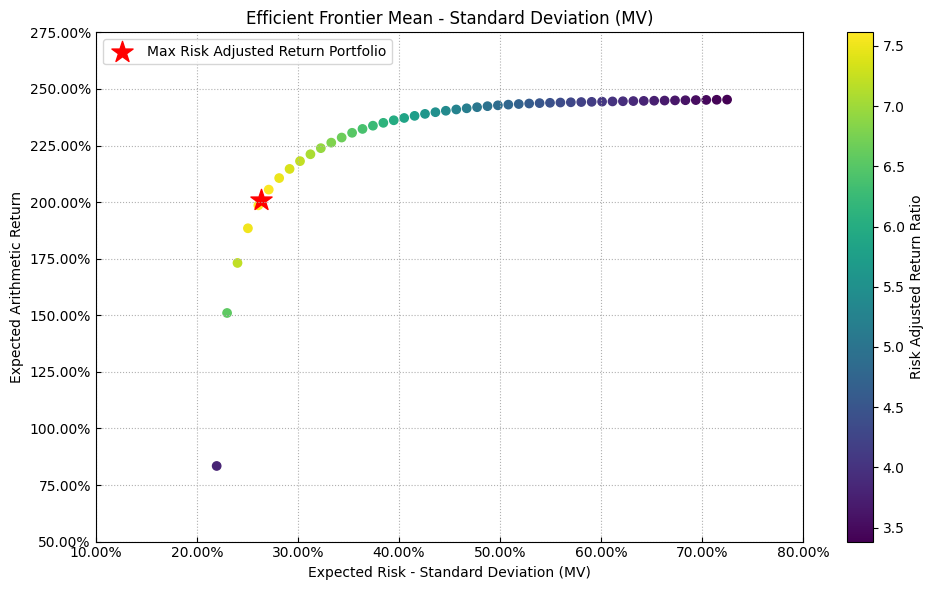

In [21]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix

returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [8]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ACE.NS,AEGISCHEM.NS,ANGELONE.NS,BCG.NS,BSE.NS,CAMLINFINE.NS,CGCL.NS,COCHINSHIP.NS,DBREALTY.NS,DHANI.NS,...,SANGHVIMOV.NS,SCHNEIDER.NS,SHILPAMED.NS,SINDHUTRAD.NS,SOBHA.NS,STLTECH.NS,TECHNOE.NS,TIMETECHNO.NS,TORNTPOWER.NS,WONDERLA.NS
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,13.6858%,28.5205%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,13.0007%,0.0000%


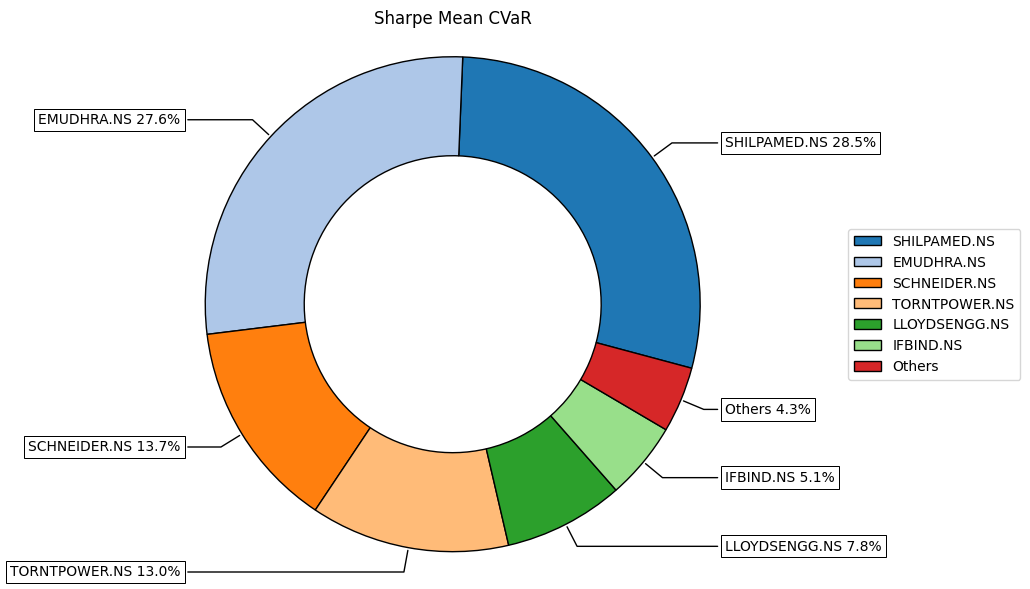

In [9]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [10]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
ACE.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
AEGISCHEM.NS,4.85%,1.64%,5.59%,11.47%,4.81%,0.00%,0.00%,0.00%,1.42%,9.10%,4.40%,6.80%,1.42%
ANGELONE.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BCG.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BSE.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CAMLINFINE.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CGCL.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
COCHINSHIP.NS,0.00%,5.98%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DBREALTY.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHANI.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


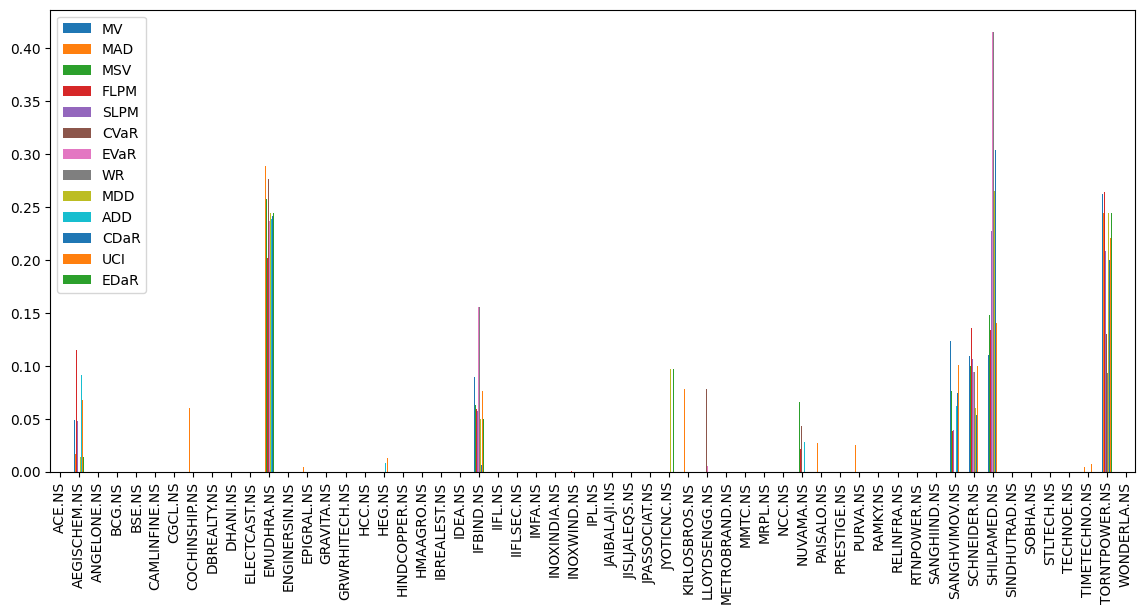

In [11]:
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'w_s'
# and you want to plot it as a bar plot

# Creating the figure and axes
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

# Assuming 'w_s' is your dataframe
w_s.plot.bar(ax=ax)

# Show the plot
plt.show()
